<a href="https://colab.research.google.com/github/dattatreya-1/Data-Analytics/blob/main/Assignment_1_Games_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('games_dataset.csv')
df.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476


In [ ]:
df.columns

Index(['Game Name', 'Genre', 'Platform', 'Release Year', 'User Rating'], dtype='object')

**Data Cleaning & Pre-processing**

**Identify and handle missing or anomalous values in the dataset**

In [ ]:
# check the null values
df.isnull().sum()

,0
Game Name,0
Genre,0
Platform,0
Release Year,0
User Rating,0


In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB


In [ ]:
df.describe()

,Release Year,User Rating
count,5000.000000,5000.000000
mean,2011.375400,5.524913
std,6.943984,2.598429
min,2000.000000,1.005878
25%,2005.000000,3.260596
50%,2011.000000,5.574233
75%,2017.000000,7.802727
max,2023.000000,9.996196


** Standardize the 'Genre' and 'Platform' columns for consistency.**

In [ ]:
# change 'Genre' from object to categorical
df['Genre'] = df['Genre'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Game Name     5000 non-null   object  
 1   Genre         5000 non-null   category
 2   Platform      5000 non-null   object  
 3   Release Year  5000 non-null   int64   
 4   User Rating   5000 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 161.9+ KB


In [ ]:
df['Genre'].value_counts()

,count
Genre,
Sports,403
Puzzle,384
Racing,369
Simulation,368
Role-playing,360
Stealth,360
Horror,356
Strategy,353
Survival,353


In [ ]:
df['Platform'] = df['Platform'].astype('category')

In [ ]:
df['Platform'].value_counts()

,count
Platform,
PC,1056
Xbox,1009
Nintendo Switch,989
Mobile,986
PlayStation,960


** Create new features such as 'Decade' from the 'Release Year' column **

In [ ]:

# Create a new column 'Decade' based on 'Release Year'
df['Decade'] = (df['Release Year'] // 10) * 10

# Display the first few rows to confirm the new feature
df.head()


,Game Name,Genre,Platform,Release Year,User Rating,Decade
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719,2010
1,Control,Puzzle,Nintendo Switch,2000,3.457386,2000
2,Among Us,Strategy,Nintendo Switch,2007,5.367622,2000
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325,2000
4,League of Legends,Simulation,PC,2021,3.535476,2020


**Exploratory Data Analysis**

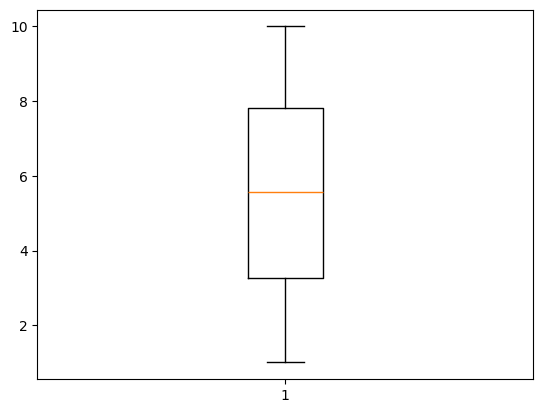

In [ ]:
plt.boxplot(df['User Rating'])
plt.show()

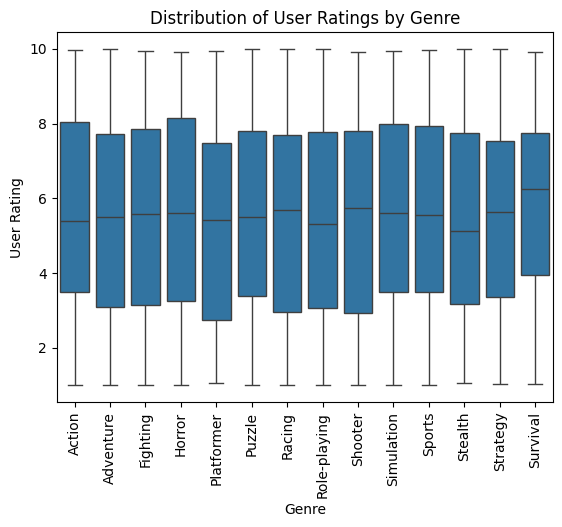

In [ ]:
import seaborn as sns
# Create a box plot to visualize the distribution of user ratings by genre
sns.boxplot(x='Genre', y='User Rating', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of User Ratings by Genre')
plt.show()

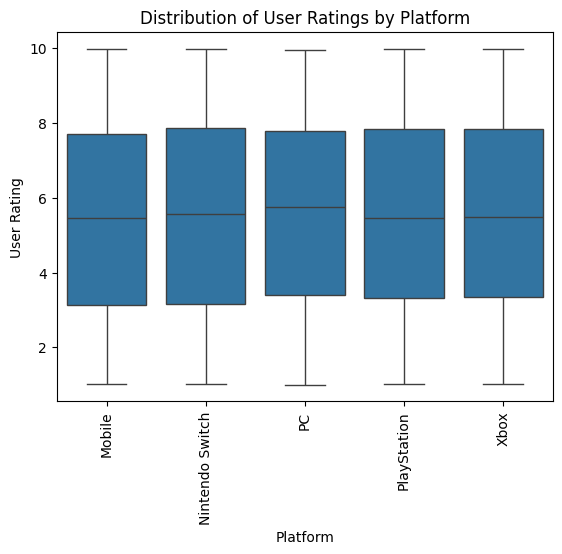

In [ ]:
sns.boxplot(x='Platform', y='User Rating', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of User Ratings by Platform')
plt.show()

In [ ]:
# Calculate the average user rating for each genre
top_genres = df.groupby('Genre')['User Rating'].mean().sort_values(ascending=False).head(5)

# Calculate the average user rating for each platform
top_platforms = df.groupby('Platform')['User Rating'].mean().sort_values(ascending=False).head(5)

top_genres


<ipython-input-17-149bc7c856f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres = df.groupby('Genre')['User Rating'].mean().sort_values(ascending=False).head(5)
<ipython-input-17-149bc7c856f5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms = df.groupby('Platform')['User Rating'].mean().sort_values(ascending=False).head(5)


,User Rating
Genre,
Survival,5.831934
Horror,5.629845
Simulation,5.626343
Action,5.603556
Sports,5.561171


In [ ]:
 top_platforms

,User Rating
Platform,
PC,5.599444
Xbox,5.531032
PlayStation,5.523658
Nintendo Switch,5.523076
Mobile,5.441895


** Advanced Analysis**
Time Series

In [ ]:
df.head()

,Game Name,Genre,Platform,Release Year,User Rating,Decade
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719,2010
1,Control,Puzzle,Nintendo Switch,2000,3.457386,2000
2,Among Us,Strategy,Nintendo Switch,2007,5.367622,2000
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325,2000
4,League of Legends,Simulation,PC,2021,3.535476,2020


** Perform a time series analysis to observe trends in game releases and user ratings over the decades **

In [ ]:
# Group data by 'Decade' and 'Release Year' and count releases
decade_releases = df.groupby(['Decade', 'Release Year'])['Game Name'].count().reset_index()

# Rename the 'Name' column to 'Releases' for clarity
decade_releases = decade_releases.rename(columns={'Game Name': 'Releases'})

# Group data by 'Decade' and calculate the average user rating
decade_ratings = df.groupby('Decade')['User Rating'].mean().reset_index()

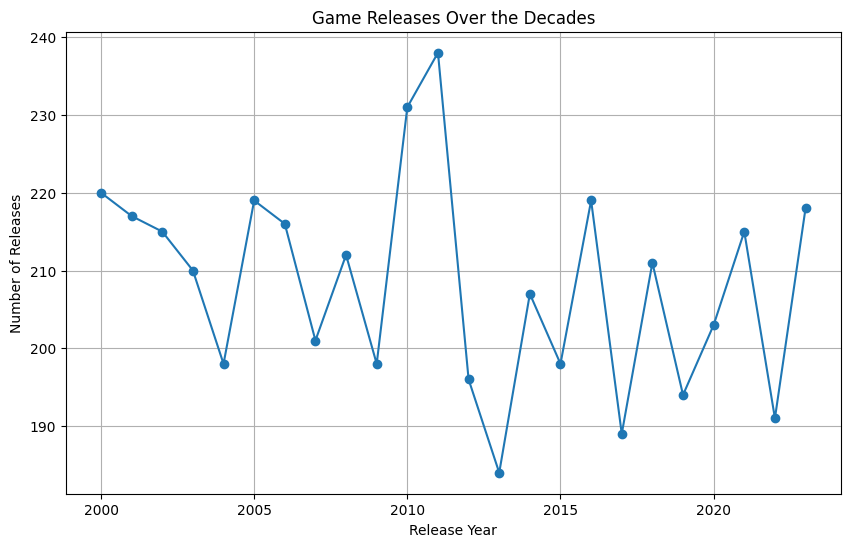

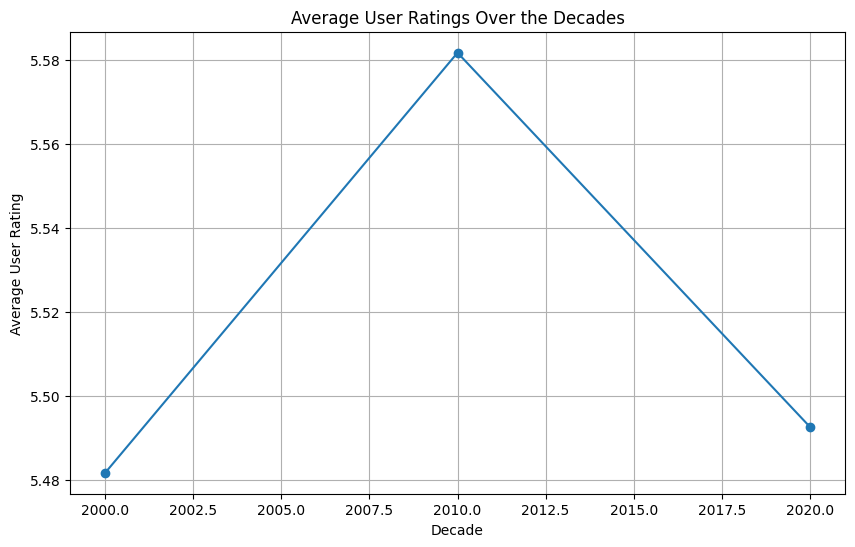

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot to visualize game releases over the decades
plt.figure(figsize=(10, 6))
plt.plot(decade_releases['Release Year'], decade_releases['Releases'], marker='o')
plt.title('Game Releases Over the Decades')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

# Create a line plot to visualize average user ratings over the decades
plt.figure(figsize=(10, 6))
plt.plot(decade_ratings['Decade'], decade_ratings['User Rating'], marker='o')
plt.title('Average User Ratings Over the Decades')
plt.xlabel('Decade')
plt.ylabel('Average User Rating')
plt.grid(True)
plt.show()

**conduct a hypothesis test to determine if theres is significant deifference between user ratings between different platforms**

In [ ]:
# ANNOVA TEST

In [ ]:
from scipy.stats import f_oneway

# Subset the data for each platform
ratings_pc = df[df['Platform'] == 'PC']['User Rating']
ratings_xbox = df[df['Platform'] == 'Xbox']['User Rating']
ratings_ps = df[df['Platform'] == 'PlayStation']['User Rating']

# Perform the ANOVA test
f_stat, p_value = f_oneway(ratings_pc, ratings_xbox, ratings_ps)

print(f'F-statistic: {f_stat}, P-value: {p_value}')


F-statistic: 0.2687393656352041, P-value: 0.7643607081811241


In [ ]:
# The user ratings for games on different platforms (e.g., PC, Xbox, PlayStation) do not show significant differences

perform a correlation analysis to identify relationships between game features and user ratings


                            Decade  User Rating  Genre_Action  \
Decade                    1.000000     0.006851      0.014275   
User Rating               0.006851     1.000000      0.008176   
Genre_Action              0.014275     0.008176      1.000000   
Genre_Adventure           0.011506    -0.001472     -0.073191   
Genre_Fighting            0.031166    -0.001210     -0.072615   
Genre_Horror              0.002224     0.011182     -0.074787   
Genre_Platformer          0.009336    -0.028008     -0.072731   
Genre_Puzzle              0.001277    -0.001469     -0.077907   
Genre_Racing              0.002533    -0.006648     -0.076247   
Genre_Role-playing       -0.027772    -0.012035     -0.075238   
Genre_Shooter             0.005751    -0.001583     -0.072615   
Genre_Simulation         -0.013650     0.011004     -0.076135   
Genre_Sports             -0.008053     0.004132     -0.079976   
Genre_Stealth             0.015099    -0.010836     -0.075238   
Genre_Strategy           

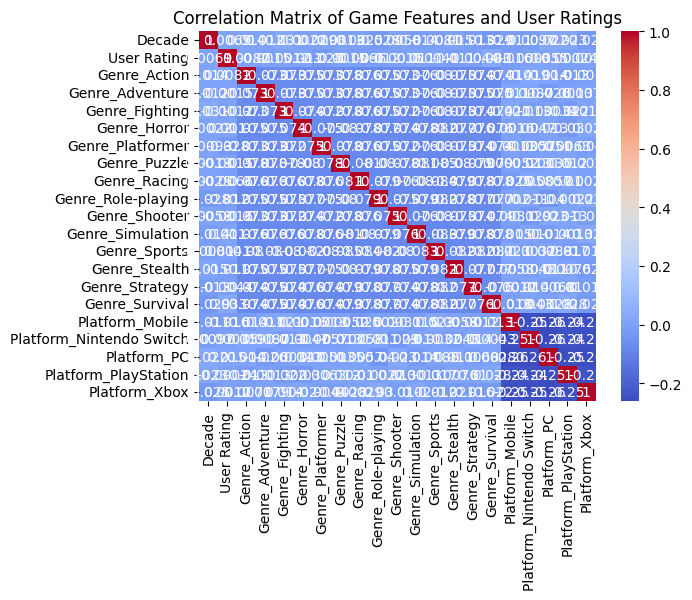

In [ ]:
import pandas as pd


features = ['Genre', 'Platform', 'Decade', 'User Rating']


data_for_correlation = df[features].copy()


data_for_correlation = pd.get_dummies(data_for_correlation, columns=['Genre', 'Platform'])


correlation_matrix = data_for_correlation.corr()

print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Game Features and User Ratings')
plt.show()

***Machine Learning***

In [ ]:
from sklearn.model_selection import train_test_split


features = ['Genre', 'Platform', 'Release Year']
target = 'User Rating'


data_for_model = df[[target] + features].copy()


data_for_model = pd.get_dummies(data_for_model, columns=['Genre', 'Platform'])


X = data_for_model.drop(columns=[target])
y = data_for_model[target]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.788734382489998
R-squared: -0.006875525522725523


Use feature selection techniques to identify the most influential factors in predicting
game ratings

In [ ]:

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})
print(feature_importance.sort_values(by='Importance', ascending=False))

                     Feature  Importance
14            Genre_Survival    0.272255
4               Genre_Horror    0.234335
1               Genre_Action    0.133974
17               Platform_PC    0.109854
10          Genre_Simulation    0.076468
9              Genre_Shooter    0.039695
2            Genre_Adventure    0.030544
18      Platform_PlayStation    0.024970
0               Release Year    0.005077
19             Platform_Xbox   -0.001810
7               Genre_Racing   -0.034062
8         Genre_Role-playing   -0.053186
16  Platform_Nintendo Switch   -0.057359
13            Genre_Strategy   -0.071198
15           Platform_Mobile   -0.075656
11              Genre_Sports   -0.079196
6               Genre_Puzzle   -0.079613
3             Genre_Fighting   -0.092429
12             Genre_Stealth   -0.098897
5           Genre_Platformer   -0.278692


In [ ]:
from sklearn.feature_selection import RFE


selector = RFE(estimator=LinearRegression(), n_features_to_select=5)  # Adjust n_features_to_select as needed


selector.fit(X_train, y_train)


selected_features = X_train.columns[selector.support_]
print(selected_features)

Index(['Genre_Action', 'Genre_Horror', 'Genre_Platformer', 'Genre_Survival',
       'Platform_PC'],
      dtype='object')
